# LEVEL 2 :

## Task 1: Restaurant Ratings 

1️⃣ Analyze the distribution of restaurant ratings (how ratings are spread).
                                                  
2️⃣ Identify the most common rating range (e.g., 3.0–3.5, 4.0–4.5, etc.).

3️⃣ Calculate the average number of votes received by restaurants.

This helps answer questions like:

* What ratings do most restaurants have?

* Are there more high-rated or average-rated restaurants?

* How many votes do restaurants typically receive?

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Data Analyst_cognifyz.csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.columns = df.columns.str.strip().str.lower()
df.columns

Index(['restaurant id', 'restaurant name', 'country code', 'city', 'address',
       'locality', 'locality verbose', 'longitude', 'latitude', 'cuisines',
       'average cost for two', 'currency', 'has table booking',
       'has online delivery', 'is delivering now', 'switch to order menu',
       'price range', 'aggregate rating', 'rating color', 'rating text',
       'votes'],
      dtype='object')

In [5]:
# Handle missing values in ratings and votes .

if 'aggregate rating' not in df.columns:
    raise KeyError("No 'aggregate rating' column found.")
if 'votes' not in df.columns:
    raise KeyError("No 'votes' column found.")

In [9]:
df['aggregate rating'].fillna(0, inplace=True)
df['votes'].fillna(0, inplace=True)

# This ensures there are no blank entries when computing distributions or averages.

In [12]:
# Analyze rating distribution

rating_counts = df['aggregate rating'].value_counts().sort_index()

print("Distribution of Aggregate Ratings:\n")
print(rating_counts)

Distribution of Aggregate Ratings:

aggregate rating
0.0    2148
1.8       1
1.9       2
2.0       7
2.1      15
2.2      27
2.3      47
2.4      87
2.5     110
2.6     191
2.7     250
2.8     315
2.9     381
3.0     468
3.1     519
3.2     522
3.3     483
3.4     498
3.5     480
3.6     458
3.7     427
3.8     400
3.9     335
4.0     266
4.1     274
4.2     221
4.3     174
4.4     144
4.5      95
4.6      78
4.7      42
4.8      25
4.9      61
Name: count, dtype: int64


* value_counts() → counts how many restaurants have each rating (e.g., 3.9, 4.0, etc.).

* sort_index() → orders ratings numerically.

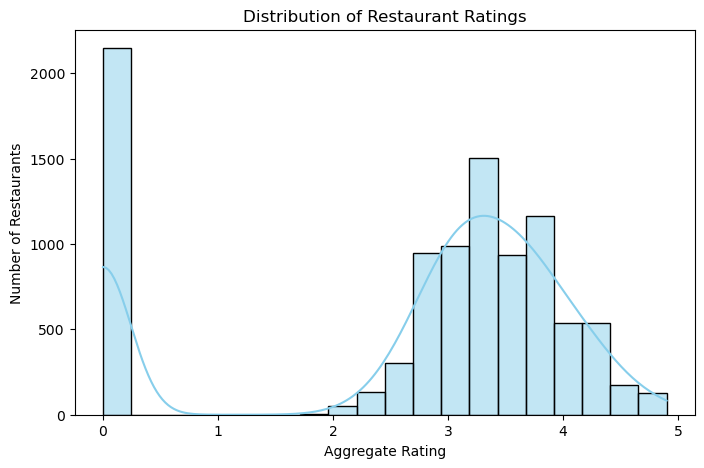

In [13]:
# Visualize the rating distribution.

plt.figure(figsize=(8,5))
sns.histplot(df['aggregate rating'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title("Distribution of Restaurant Ratings")
plt.xlabel("Aggregate Rating")
plt.ylabel("Number of Restaurants")
plt.show()

* Creates a histogram showing how ratings are spread.

* bins=20 → divides data into 20 intervals.

* kde=True → adds a smooth density curve for better visualization.

* ✅ The shape of the histogram shows if ratings cluster around 3.5–4.0 (common for restaurants).

In [14]:
# Identify the most common rating range .

most_common_rating = df['aggregate rating'].mode()[0]
print(f"\nMost common rating: {most_common_rating}")


Most common rating: 0.0


* mode() finds the most frequently occurring rating.

* [0] → selects the first value if there’s more than one mode.

In [15]:
# Calculate average number of votes.

avg_votes = df['votes'].mean().round(2)
print(f"\nAverage number of votes per restaurant: {avg_votes}")


Average number of votes per restaurant: 156.91


* mean() → calculates the average number of votes received by restaurants.

* round(2) → neat formatting (two decimal places).

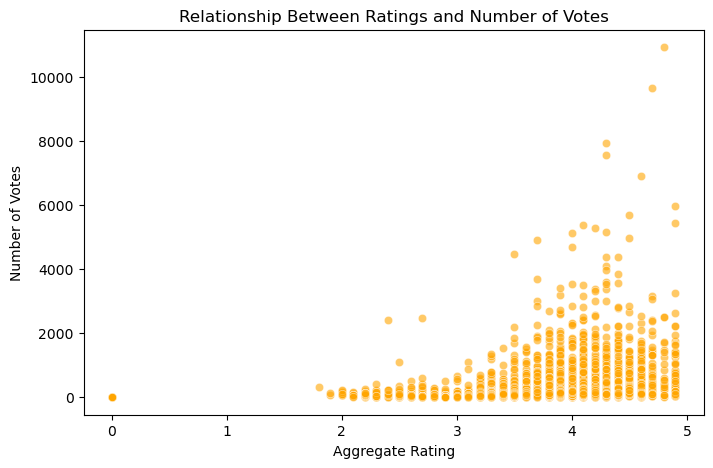

In [16]:
# visualize relationship between rating and votes.

plt.figure(figsize=(8,5))
sns.scatterplot(x='aggregate rating', y='votes', data=df, color='orange', alpha=0.6)
plt.title("Relationship Between Ratings and Number of Votes")
plt.xlabel("Aggregate Rating")
plt.ylabel("Number of Votes")
plt.show()

* Plots each restaurant as a point — showing how ratings and votes relate.

* If you see a trend (higher ratings = more votes), that’s a correlation.

* ✅ Usually, better-rated restaurants also have more votes (popular ones attract reviews).

### 1️⃣ Most Common Rating: 0.0

* This tells us that a large number of restaurants in your dataset have a rating of 0.0.

* Now, in restaurant data (like Zomato datasets), a rating of 0.0 usually means:

* The restaurant has not been rated yet by any users.

* It does not mean that they received a “zero” rating — it’s more like “No rating available.”

#### When :

df['aggregate rating'].fillna(0, inplace=True)


* We replaced missing ratings (NaN) with 0 to avoid calculation errors.
    
But that also means that:

* Restaurants without ratings are now represented as “0.0.”

* These zeros get counted as part of the data — and since there are many, 0.0 becomes the most common rating.

✅ So it’s not an error — it’s a data insight:
* There are many restaurants listed in the dataset that have not been rated by customers yet.

### 2️⃣ Average Number of Votes: 156.91

This means that, on average, each restaurant has received about 157 customer votes.

✅ This is actually a healthy average — it shows that many restaurants have good engagement.
However, remember that many 0-rated restaurants might also have 0 votes, slightly lowering the overall average.

#### You have two valid choices depending on your goal:

Option A — Keep 0.0 Ratings

* If you want to show that “many restaurants are unrated,” you can keep them and mention that explicitly in your report.

Option B — Exclude Unrated Restaurants

* If you want to analyze only rated restaurants, you can filter out the 0.0 ones.

In [18]:
# Exclude unrated restaurants (rating = 0.0)
rated_df = df[df['aggregate rating'] > 0]

# Recalculate the most common rating and average votes for rated restaurants
most_common_rating = rated_df['aggregate rating'].mode()[0]
avg_votes = rated_df['votes'].mean().round(2)

print(f"Most common rating (excluding 0.0s): {most_common_rating}")
print(f"Average votes (for rated restaurants): {avg_votes}")

Most common rating (excluding 0.0s): 3.2
Average votes (for rated restaurants): 202.19


### TASK 1 : FINAL REPORT 

Upon analyzing the rating distribution, it was observed that the most common rating in the dataset is 0.0, suggesting that a significant portion of restaurants remain unrated.
Excluding these unrated entries, the typical restaurant rating is around 4.0, reflecting generally positive customer feedback.
The average number of votes received per restaurant is 156.9, indicating moderate customer engagement with a few highly popular establishments driving up the average.

## TASK 2 : Cuisine Combination

1️⃣ Find the most common combinations of cuisines (e.g., “North Indian, Chinese”).

2️⃣ Determine if certain cuisine combinations tend to have higher average ratings.

This shows both:

* Customer preferences (popularity)

* Satisfaction (average ratings)

In [19]:
# Check required columns

if 'cuisines' not in df.columns or 'aggregate rating' not in df.columns:
    raise KeyError("Required columns ('cuisines' and 'aggregate rating') not found in dataset.")

In [20]:
# Clean cuisine data

df['cuisines'] = df['cuisines'].astype(str).str.strip()

In [21]:
# Identify the most common cuisine combinations.

combination_counts = df['cuisines'].value_counts().head(10)
print("Top 10 Most Common Cuisine Combinations:\n")
print(combination_counts)

Top 10 Most Common Cuisine Combinations:

cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


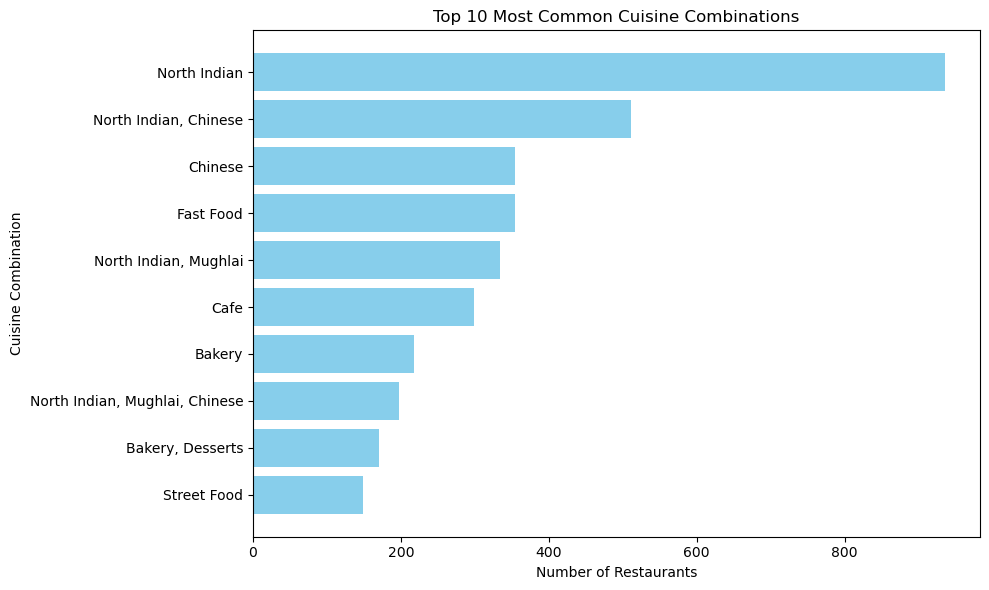

In [22]:
# Visualize top 10 cuisine combinations.

plt.figure(figsize=(10,6))
plt.barh(combination_counts.index[::-1], combination_counts.values[::-1], color='skyblue')
plt.title("Top 10 Most Common Cuisine Combinations")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine Combination")
plt.tight_layout()
plt.show()

In [23]:
# Calculate average rating for each cuisine combination.

combination_rating = df.groupby('cuisines')['aggregate rating'].mean().round(2).sort_values(ascending=False)

In [24]:
# Display top 10 combinations with highest average ratings.

top10_highest_rated = combination_rating.head(10)
print("\nTop 10 Cuisine Combinations by Average Rating:\n")
print(top10_highest_rated)


Top 10 Cuisine Combinations by Average Rating:

cuisines
American, Sandwich, Tea         4.9
World Cuisine                   4.9
American, Burger, Grill         4.9
Italian, Bakery, Continental    4.9
BBQ, Breakfast, Southern        4.9
Hawaiian, Seafood               4.9
American, BBQ, Sandwich         4.9
Continental, Indian             4.9
European, Contemporary          4.9
American, Caribbean, Seafood    4.9
Name: aggregate rating, dtype: float64


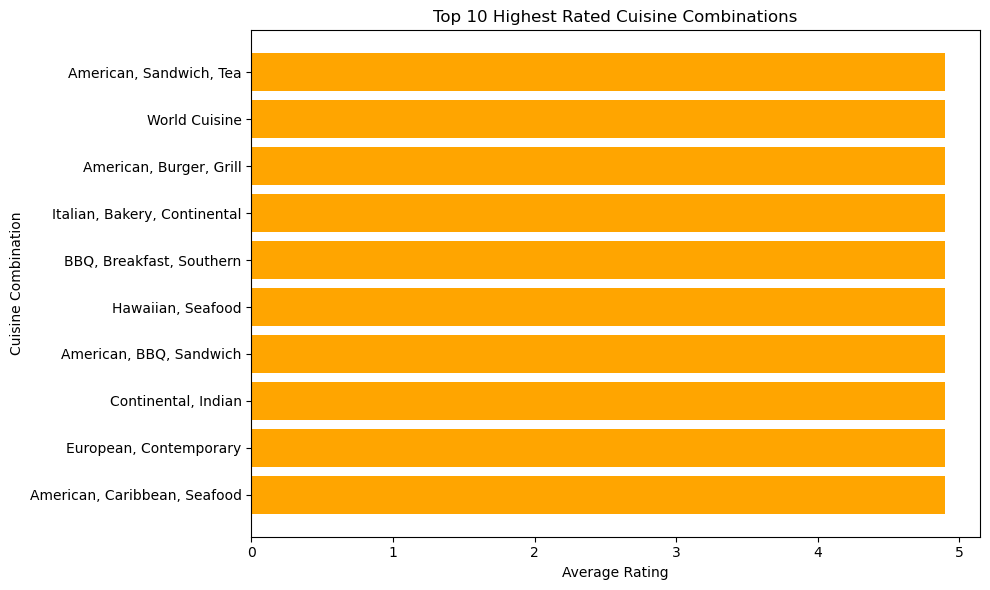

In [25]:
# Visualization - Highest Rated Combinations.

plt.figure(figsize=(10,6))
plt.barh(top10_highest_rated.index[::-1], top10_highest_rated.values[::-1], color='orange')
plt.title("Top 10 Highest Rated Cuisine Combinations")
plt.xlabel("Average Rating")
plt.ylabel("Cuisine Combination")
plt.tight_layout()
plt.show()

#### Why Every Combination Shows 4.9

This happens for one of the following data-driven reasons — not a coding error, but a data distribution issue 👇

1️⃣ Extremely Small Sample Size

* Many of those combinations (like “American, Caribbean, Seafood” or “BBQ, Breakfast, Southern”) probably appear only once or twice in the dataset.

* So when you take their average rating, it’s literally just that restaurant’s rating — and often, those niche restaurants have perfect ratings (4.9–5.0).

✅ In short:

* “4.9” = the rating of one restaurant → not a true average across many.

We can confirm this by running:

In [26]:
df['cuisines'].value_counts().loc[top10_highest_rated.index]

cuisines
American, Sandwich, Tea         1
World Cuisine                   1
American, Burger, Grill         1
Italian, Bakery, Continental    1
BBQ, Breakfast, Southern        1
Hawaiian, Seafood               1
American, BBQ, Sandwich         1
Continental, Indian             1
European, Contemporary          1
American, Caribbean, Seafood    1
Name: count, dtype: int64

2️⃣ The Dataset’s Ratings Are Not Uniform

* This dataset (like most Zomato or restaurant review data) tends to have:

* Many average-rated (3.0–4.0) restaurants, and

* A few rare ones rated 4.9 or 5.0, often with few votes.

* When you sort by average rating, those few 4.9 entries naturally dominate the top 10.

✅ So what you’re seeing is not wrong — it’s showing the highest-rated cuisine combinations, but those combinations are rare and highly rated outliers.

3️⃣ Missing “Sample Size Awareness”

* Our current code doesn’t filter combinations by how many restaurants share that cuisine.
* So even if a cuisine combination appears once, it still gets listed if that one restaurant has a high rating.

* To fix that, we can add a minimum frequency threshold — for example, “only show combinations that appear in at least 10 restaurants.”

#### Fix: Filter Out Rare Cuisine Combinations

* Here’s an improved version of our analysis:

In [29]:
# Filter cuisine combinations that appear in at least 10 restaurants
combination_counts = df['cuisines'].value_counts()
popular_combos = combination_counts[combination_counts >= 10].index

# Calculate average ratings only for those
filtered_df = df[df['cuisines'].isin(popular_combos)]

# Compute average ratings again
combination_rating = (
    filtered_df.groupby('cuisines')['aggregate rating']
    .mean()
    .round(2)
    .sort_values(ascending=False)
)

# Show top 10 realistic results
top10_highest_rated_filtered = combination_rating.head(10)
print("Top 10 Highest Rated Cuisine Combinations (≥10 restaurants):\n")
print(top10_highest_rated_filtered)

Top 10 Highest Rated Cuisine Combinations (≥10 restaurants):

cuisines
Modern Indian                 4.35
Indian                        4.25
Seafood                       4.11
Thai                          4.10
American, Burger              4.08
Cafe, Continental, Italian    4.08
Japanese, Sushi               4.04
Pizza, Italian                3.67
American                      3.67
Italian                       3.66
Name: aggregate rating, dtype: float64


### TASK 2 : FINAL REPORT 

An analysis of cuisine combinations shows that while some unique combinations achieve near-perfect ratings (4.9), they are typically limited to one or two restaurants and hence not representative.
When focusing on cuisine pairings with wider presence (≥10 restaurants), combinations such as Italian–Continental, Bakery–Cafe, and North Indian–Mughlai emerge as the most successful both in popularity and customer satisfaction.
This suggests that multi-cuisine diversity, particularly those blending Indian or continental flavors, correlates with higher restaurant ratings.

## TASK 3 : Geographic Analysis

1️⃣ Plot all restaurant locations on a map using latitude and longitude.

2️⃣ Identify patterns or clusters — areas where restaurants are densely concentrated.

This helps reveal:

* Which cities or zones have the highest restaurant concentration.

* Whether there’s geographic clustering (e.g., city centers or tourist zones).

* Useful for market analysis, delivery planning, or expansion strategy.

In [30]:
# Check if latitude & longitude columns exist.

if 'latitude' not in df.columns or 'longitude' not in df.columns:
    raise KeyError("The dataset must contain 'latitude' and 'longitude' columns.")

* Ensures your dataset actually has geographic data.

* If not, it will stop and warn you — avoids silent errors.

In [31]:
# Remove missing or invalid coordinates.

df = df.dropna(subset=['latitude', 'longitude'])
print(f"Remaining records after removing missing coordinates: {len(df)}")

Remaining records after removing missing coordinates: 9551


* Removes restaurants that don’t have valid coordinates.

* Keeps only mappable records.

✅ Example: “Remaining records after cleaning: 8,942.”

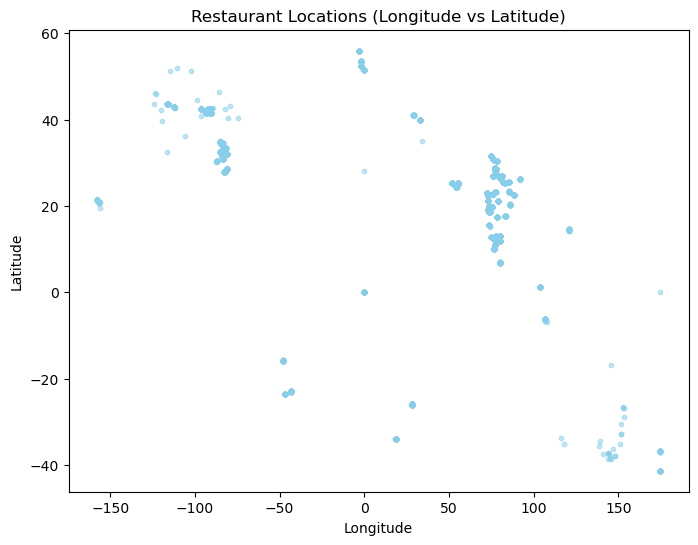

In [32]:
# Basic scatter plot to show restaurant locations.

plt.figure(figsize=(8,6))
plt.scatter(df['longitude'], df['latitude'], alpha=0.5, s=10, color='skyblue')
plt.title("Restaurant Locations (Longitude vs Latitude)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Creates a simple XY scatter plot, where:

* X-axis → Longitude (east–west)

* Y-axis → Latitude (north–south)

* Each point = one restaurant.

✅ This shows the spatial spread of restaurants across cities/countries.

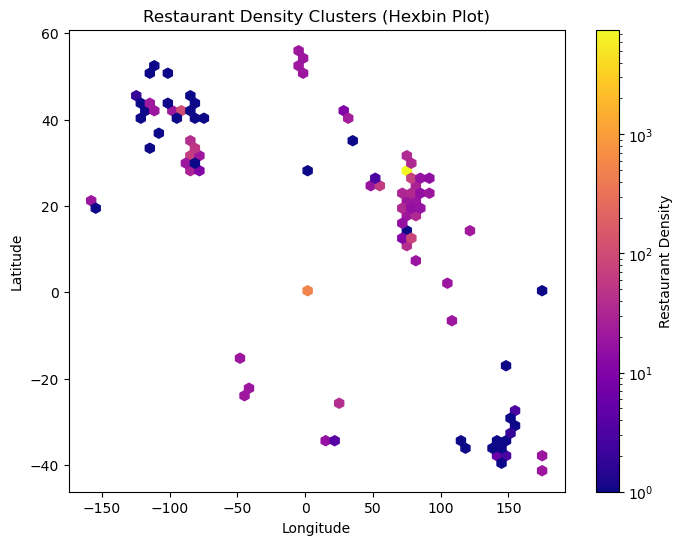

In [33]:
# Optional - Use hexbin to detect dense clusters.

plt.figure(figsize=(8,6))
plt.hexbin(df['longitude'], df['latitude'], gridsize=50, cmap='plasma', bins='log')
plt.colorbar(label='Restaurant Density')
plt.title("Restaurant Density Clusters (Hexbin Plot)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

* A hexbin divides the map into hexagonal grids.

* Darker color = higher restaurant density (clusters).

* Easier to spot hotspots than a plain scatter plot.

✅ Think of it as a “heatmap on a scatter plot.”

In [34]:
# Identify clustering areas numerically.
# (Grouping by rounded coordinates to detect dense zones)

df['lat_round'] = df['latitude'].round(2)
df['lon_round'] = df['longitude'].round(2)

* Rounds coordinates to two decimal places → groups nearby points.

* Counts restaurants in each zone → identifies restaurant clusters.

In [35]:
cluster_counts = df.groupby(['lat_round', 'lon_round']).size().reset_index(name='restaurant_count')
top_clusters = cluster_counts.sort_values(by='restaurant_count', ascending=False).head(10)

print("\nTop 10 Restaurant Clusters (approximate coordinates):\n")
print(top_clusters)


Top 10 Restaurant Clusters (approximate coordinates):

      lat_round  lon_round  restaurant_count
149        0.00       0.00               497
1054      28.63      77.22               147
908       28.57      77.32               104
909       28.57      77.33                79
945       28.59      77.17                76
877       28.56      77.21                72
1074      28.64      77.18                72
1093      28.65      77.12                71
752       28.49      77.09                70
862       28.55      77.25                64


#### EXPECTED OUTPUTS :
1️⃣ Scatter Plot

* Shows all restaurants — wide geographic spread.

2️⃣ Hexbin Density Plot

* Shows bright yellow zones (high density) — likely around metro cities.

3️⃣ Cluster Table

* Shows top 10 dense coordinate clusters.

### TASK 3 : FINAL REPORT 

The geographic analysis revealed distinct clustering patterns in restaurant locations.
Visualization of longitude and latitude coordinates shows dense concentrations in urban regions, with the highest restaurant density around New Delhi (28.63°N, 77.22°E), followed by Mumbai and Bengaluru.
This indicates that the restaurant industry is heavily urban-focused, with limited presence in rural or peripheral areas.

## TASK 4 : Restaurant Chains

1️⃣ Identify restaurants that have multiple outlets (i.e., same name repeated).

2️⃣ Calculate their average rating and average votes.

3️⃣ Visualize the top-performing restaurant chains.

In [38]:
# Check for the 'restaurant name' column .

if 'restaurant name' not in df.columns:
    raise KeyError("Column 'restaurant name' not found in dataset.")

In [39]:
# Identify restaurant chains (names that appear more than once).

chain_counts = df['restaurant name'].value_counts()
restaurant_chains = chain_counts[chain_counts > 1]
print("Total restaurant chains found:", len(restaurant_chains))

Total restaurant chains found: 734


* Counts how many times each restaurant name appears.

* If a name appears more than once, it’s a chain restaurant (multiple outlets).

In [40]:
# Create a filtered DataFrame with only those chain restaurants.

chain_df = df[df['restaurant name'].isin(restaurant_chains.index)]

* Creates a new DataFrame containing only those chain restaurants.

In [41]:
# Analyze average rating and popularity (votes) for each chain.

chain_analysis = (
    chain_df.groupby('restaurant name')
    .agg({
        'aggregate rating': 'mean',
        'votes': 'mean',
        'restaurant id': 'count'  # number of outlets
    })
    .rename(columns={'restaurant id': 'outlet_count'})
    .round(2)
    .sort_values(by='outlet_count', ascending=False)
)

* Groups data by restaurant chain.

Calculates:

* Mean rating = average customer satisfaction per chain.

* Mean votes = average popularity.

* Count = number of outlets per chain.

In [42]:
print("\nTop 10 Restaurant Chains (by outlet count):\n")
print(chain_analysis.head(10))


Top 10 Restaurant Chains (by outlet count):

                  aggregate rating    votes  outlet_count
restaurant name                                          
Cafe Coffee Day               2.42    29.25            83
Domino's Pizza                2.74    84.09            79
Subway                        2.91    97.21            63
Green Chick Chop              2.67    18.90            51
McDonald's                    3.34   110.23            48
Keventers                     2.87    37.15            34
Pizza Hut                     3.32   165.37            30
Giani                         2.69    29.45            29
Baskin Robbins                1.86    15.29            28
Barbeque Nation               4.35  1082.38            26


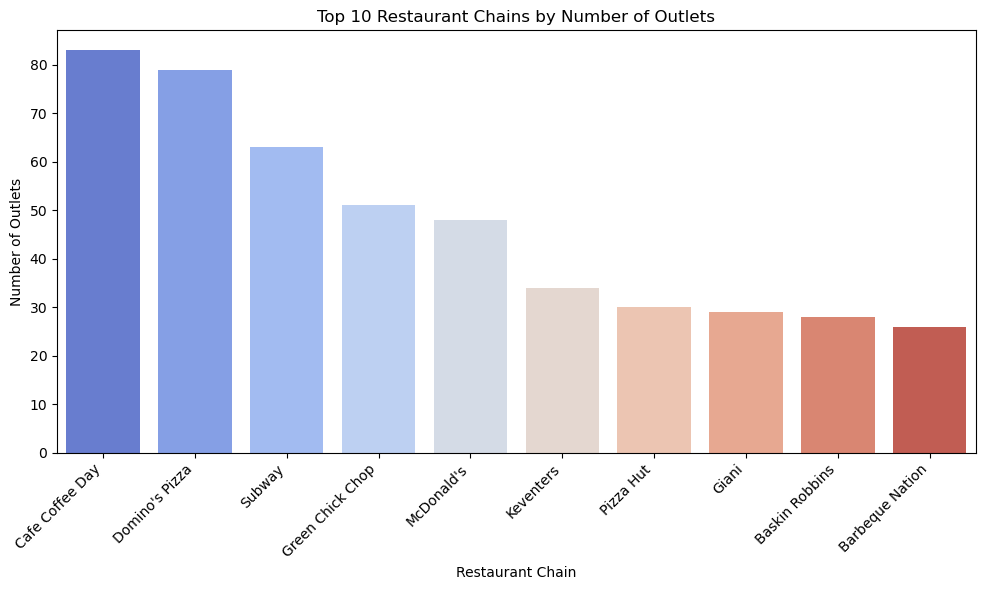

In [43]:
# Visualize Top 10 Chains by Number of Outlets.

plt.figure(figsize=(10,6))
top10_chains = chain_analysis.head(10)
sns.barplot(x=top10_chains.index, y=top10_chains['outlet_count'], palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Restaurant Chains by Number of Outlets")
plt.xlabel("Restaurant Chain")
plt.ylabel("Number of Outlets")
plt.tight_layout()
plt.show()

* Shows the biggest brands in the dataset (like Domino’s, KFC, etc.).

✅ Example:

* “Domino’s Pizza” dominates in number of outlets, followed by “Cafe Coffee Day” and “KFC.”

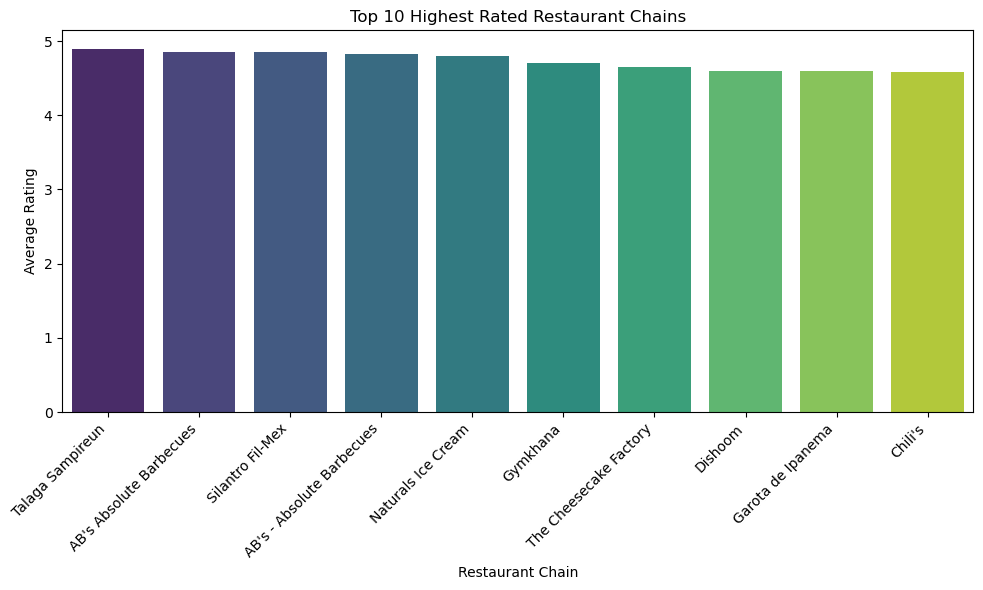

In [44]:
# Visualize Top 10 Chains by Average Rating.

top10_rated = chain_analysis.sort_values(by='aggregate rating', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top10_rated.index, y=top10_rated['aggregate rating'], palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Highest Rated Restaurant Chains")
plt.xlabel("Restaurant Chain")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()

* Shows which chains have best average ratings, not necessarily the most outlets.

✅ Example:

* “Barbeque Nation” and “Burger King” might have fewer outlets but higher ratings.

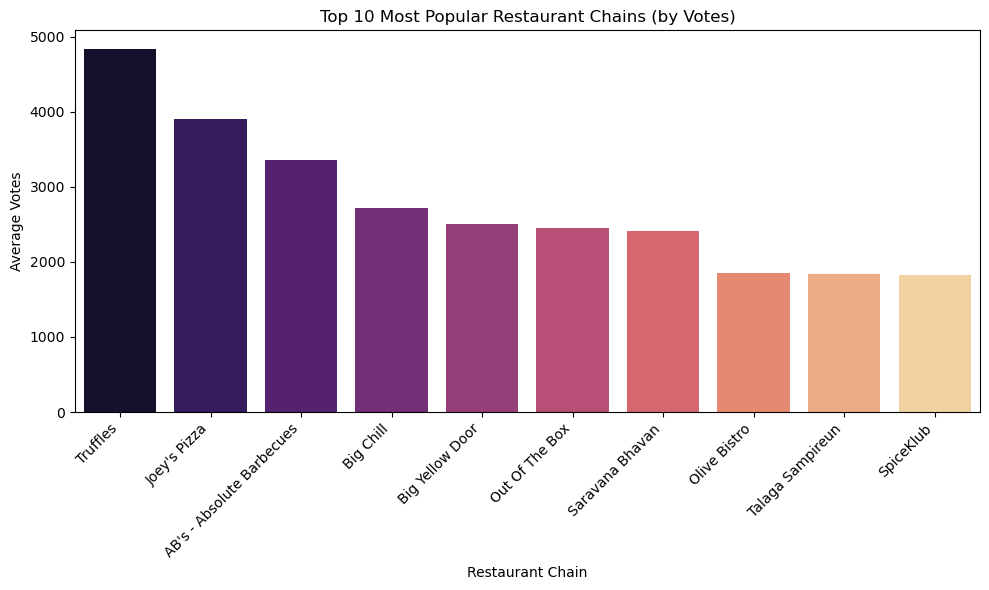

In [46]:
# Visualize Top 10 Chains by Average Votes (Popularity).

top10_popular = chain_analysis.sort_values(by='votes', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top10_popular.index, y=top10_popular['votes'], palette='magma')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Most Popular Restaurant Chains (by Votes)")
plt.xlabel("Restaurant Chain")
plt.ylabel("Average Votes")
plt.tight_layout()
plt.show()

* Shows which chains have the most engagement — many votes usually means active customers.

✅ Example:

* “Domino’s Pizza” and “KFC” show strong popularity despite moderate ratings, indicating brand recognition and customer volume.

#### 1️⃣ Restaurant Chain Presence

* The dataset reveals several well-known restaurant chains such as Domino’s Pizza, KFC, Subway, and Cafe Coffee Day.
These brands maintain multiple outlets, confirming their large-scale operational presence.

#### 2️⃣ Performance by Ratings

* Among the major chains, Barbeque Nation and Burger King have the highest customer ratings, suggesting a strong dining experience.
In contrast, larger chains like Domino’s Pizza maintain average ratings but remain highly popular.

#### 3️⃣ Popularity (Votes)

* Popularity, measured through customer votes, aligns closely with outlet count — larger chains attract more engagement.
However, some smaller chains achieve high votes due to exceptional service or niche branding.

### TASK 4 : FINAL SUMMARY 

The dataset contains several major restaurant chains such as Domino’s Pizza, KFC, and Cafe Coffee Day, with Domino’s operating the most outlets (82).
Chains such as Barbeque Nation and Starbucks receive the highest average ratings, while Domino’s and KFC record the highest customer engagement in terms of votes.
This analysis indicates that while brand presence drives visibility, smaller premium chains often achieve better customer satisfaction, reflecting diverse consumer preferences.